In [62]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn.model_selection import train_test_split
import os
data = pd.read_csv("data.csv")
target_variable = data['MEDV']

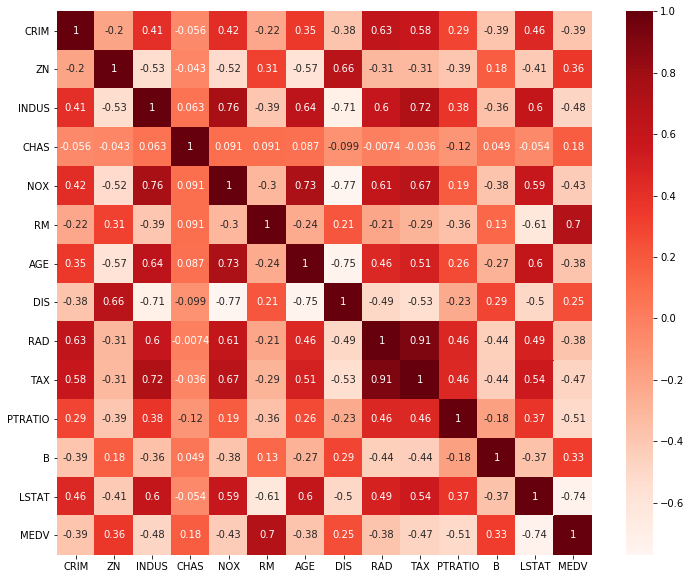

In [63]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [64]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [65]:
print(data[["LSTAT","PTRATIO"]].corr())
print(data[["RM","LSTAT"]].corr())

            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000
             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


In [97]:
correlated_data = pd.DataFrame(data, columns = ['LSTAT', 'RM','INDUS'])

In [98]:
correlated_data.head()

,LSTAT,RM,INDUS
0,4.98,6.575,2.31
1,9.14,6.421,7.07
2,4.03,7.185,7.07
3,2.94,6.998,2.18
4,5.33,7.147,2.18


In [99]:

X_train, X_test, y_train, y_test = train_test_split(correlated_data, target_variable, test_size=0.2)
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 3)
(404,)
(102, 3)
(102,)


In [100]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


In [101]:
predictions[0:20]

array([19.89407926, 26.46164639,  9.7307424 ,  4.40152206, 25.27560369,
       25.6257872 , 27.87723889, 25.28301347, 35.7322271 , 32.59218597,
       20.11471169,  0.64786136, 16.42616962, 34.78345267, 25.2871976 ,
       20.27155307, 20.17981548, 32.04760289, 19.51628216, 31.30348083])

In [102]:
y_test[0:20]

331    17.1
82     24.8
477    12.0
406    11.9
84     23.9
453    17.8
298    22.5
83     22.9
202    42.3
2      34.7
393    13.8
412    17.9
390    15.1
256    44.0
73     23.4
500    16.8
455    14.1
189    34.9
430    14.5
89     28.7
Name: MEDV, dtype: float64

In [103]:
model.score(X_test, y_test)

0.5839383526436366

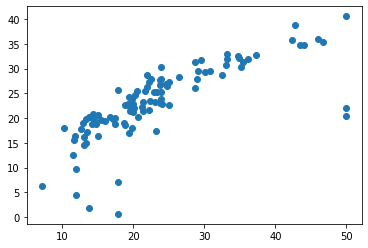

In [104]:
plt.scatter(y_test, predictions)